## Imports

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input
import vis_helper as v

2022-03-22 09:07:18.762018: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/openvino_2021/data_processing/dl_streamer/lib:/opt/intel/openvino_2021/data_processing/gstreamer/lib:/opt/intel/openvino_2021/opencv/lib:/opt/intel/openvino_2021/deployment_tools/ngraph/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/tbb/lib::/opt/intel/openvino_2021/deployment_tools/inference_engine/external/hddl/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/omp/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/gna/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/mkltiny_lnx/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/lib/intel64
2022-03-22 09:07:18.762043: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore ab

## Prepare dataset

In [2]:
X1 = np.arange(1, 26)*2
X2 = np.arange(1, 26)*3

X = np.column_stack([X1, X2])

y = []
for i in zip(X1, X2):
    y.append([i[0]+1, i[1]+1])
    
y = np.array(y)
X = X.reshape(-1, 1, 2)

print("X: ", X)
print("y: ", y)

X:  [[[ 2  3]]

 [[ 4  6]]

 [[ 6  9]]

 [[ 8 12]]

 [[10 15]]

 [[12 18]]

 [[14 21]]

 [[16 24]]

 [[18 27]]

 [[20 30]]

 [[22 33]]

 [[24 36]]

 [[26 39]]

 [[28 42]]

 [[30 45]]

 [[32 48]]

 [[34 51]]

 [[36 54]]

 [[38 57]]

 [[40 60]]

 [[42 63]]

 [[44 66]]

 [[46 69]]

 [[48 72]]

 [[50 75]]]
y:  [[ 3  4]
 [ 5  7]
 [ 7 10]
 [ 9 13]
 [11 16]
 [13 19]
 [15 22]
 [17 25]
 [19 28]
 [21 31]
 [23 34]
 [25 37]
 [27 40]
 [29 43]
 [31 46]
 [33 49]
 [35 52]
 [37 55]
 [39 58]
 [41 61]
 [43 64]
 [45 67]
 [47 70]
 [49 73]
 [51 76]]


## Hyperparameters

In [3]:
EPOCHS = 2000
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

## Solution via Simple LSTM

In [4]:
model = Sequential()
inputs = Input(shape=(1, 2))
model.add(inputs)
model.add(LSTM(50, activation='relu'))
model.add(Dense(2))

2022-03-22 09:07:20.142528: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-22 09:07:20.142689: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/openvino_2021/data_processing/dl_streamer/lib:/opt/intel/openvino_2021/data_processing/gstreamer/lib:/opt/intel/openvino_2021/opencv/lib:/opt/intel/openvino_2021/deployment_tools/ngraph/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/tbb/lib::/opt/intel/openvino_2021/deployment_tools/inference_engine/external/hddl/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/omp/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/gna/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/mkltiny_lnx/lib:/opt/intel/openvino_2021/deployment

In [5]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10600     
_________________________________________________________________
dense (Dense)                (None, 2)                 102       
Total params: 10,702
Trainable params: 10,702
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, verbose=0)

2022-03-22 09:07:20.231117: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-22 09:07:20.251425: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2803200000 Hz


## Training Plot

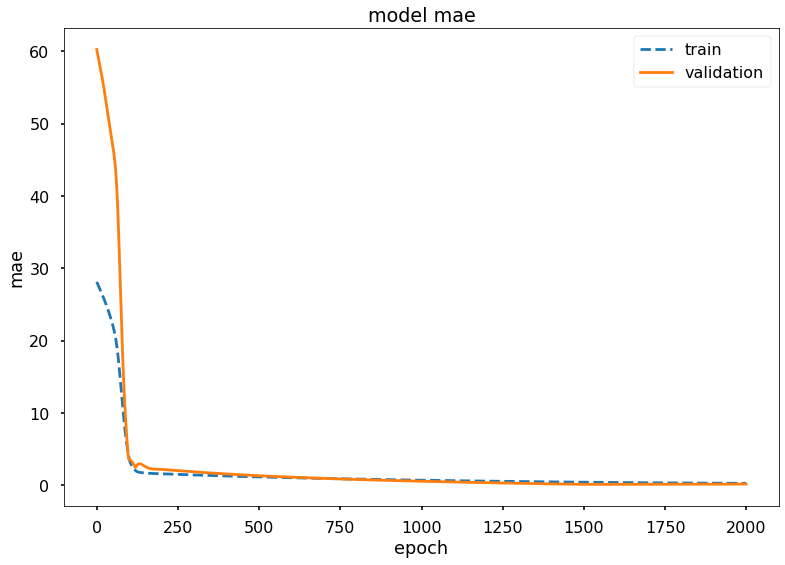

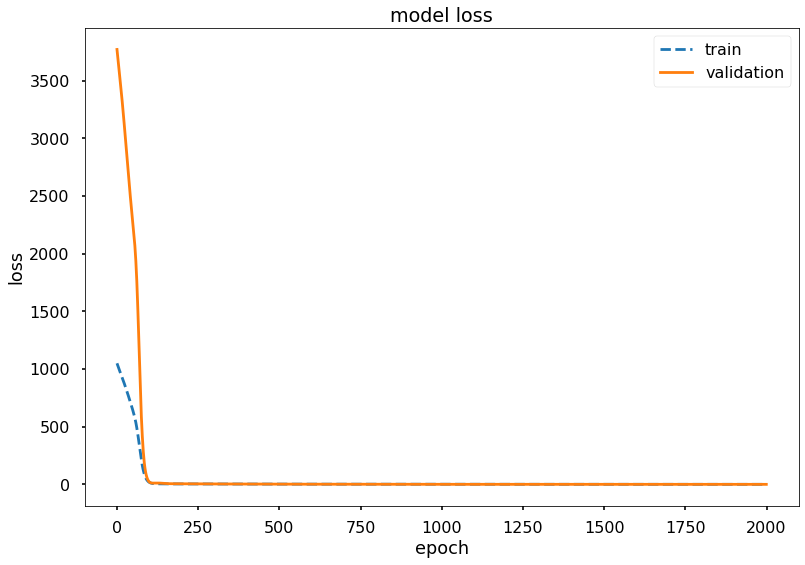

In [8]:
v.plot(history)

## Predictions

In [9]:
test_input = np.array([40, 60])
test_input = test_input.reshape((1, 1, 2))
test_output = model.predict(test_input, verbose=0)
print("Input: ", test_input)
print("Expected: ", [41, 61])
print("Output: ", test_output)

Input:  [[[40 60]]]
Expected:  [41, 61]
Output:  [[41.071716 60.83374 ]]


___

## Solution via Stacked LSTM

In [10]:
model = Sequential()
inputs = Input(shape=(1, 2))
model.add(inputs)
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(100, activation='relu', return_sequences=False))
model.add(Dense(50, activation='relu'))
model.add(Dense(2))

In [11]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            162400    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total params: 287,952
Trainable params: 287,952
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, verbose=0)

## Training Plot

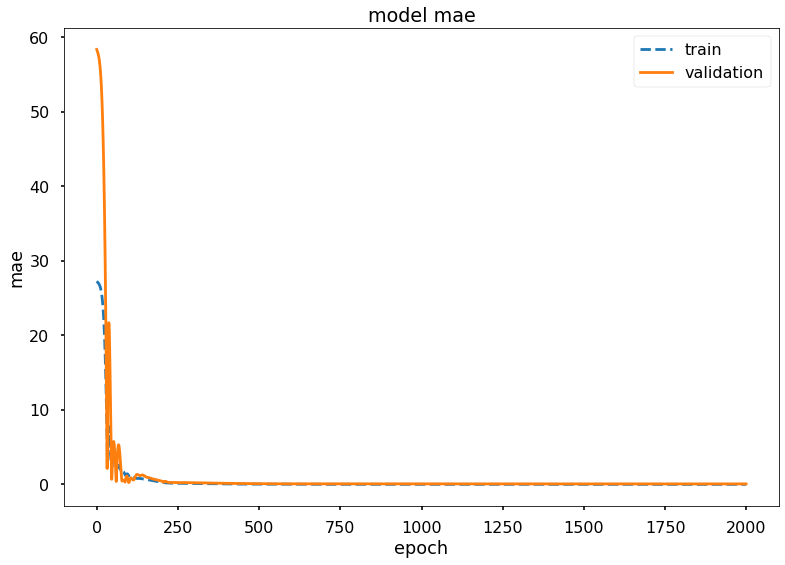

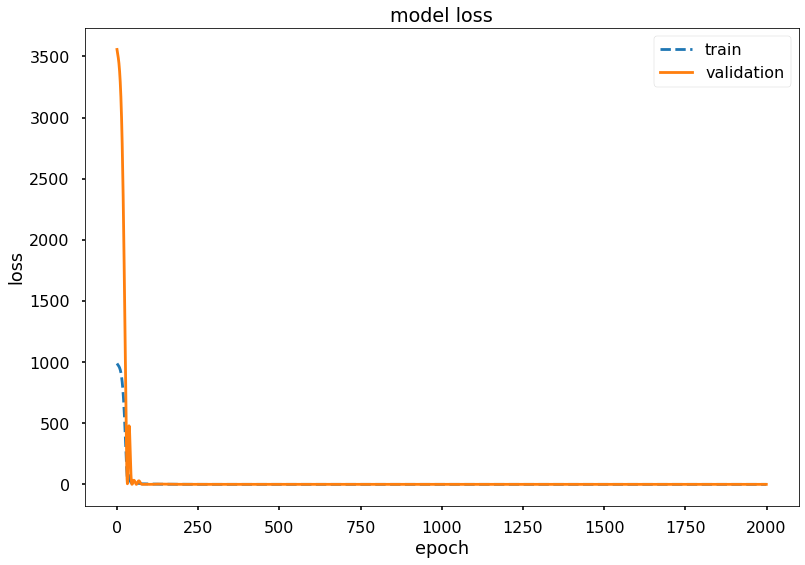

In [14]:
v.plot(history)

## Predictions

In [15]:
test_input = np.array([40, 60])
test_input = test_input.reshape((1, 1, 2))
test_output = model.predict(test_input, verbose=0)
print("Input: ", test_input)
print("Expected: ", [41, 61])
print("Output: ", test_output)

Input:  [[[40 60]]]
Expected:  [41, 61]
Output:  [[40.996937 60.980545]]


___

## Solution via Bidirectional LSTM

In [16]:
model = Sequential()
inputs = Input(shape=(1, 2))
model.add(inputs)
model.add(Bidirectional(LSTM(50, activation='relu')))
model.add(Dense(2))

In [17]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 100)               21200     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 21,402
Trainable params: 21,402
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, verbose=0)

## Training Plot

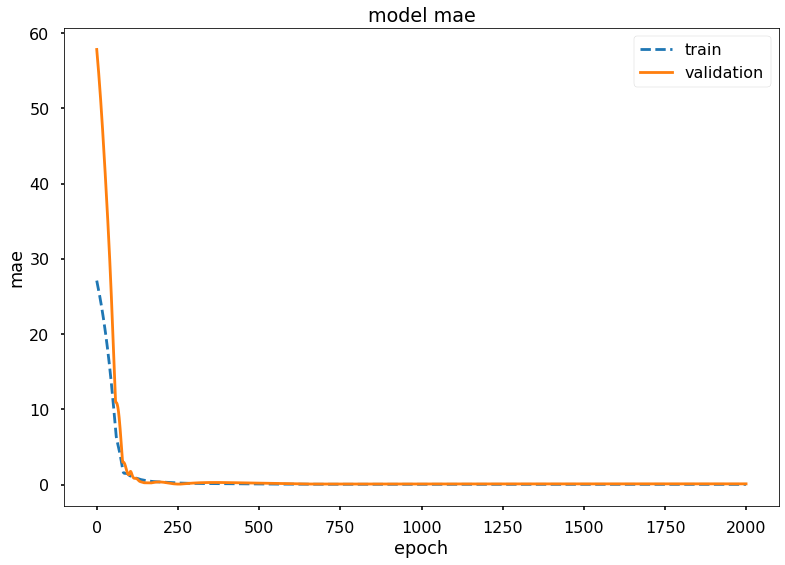

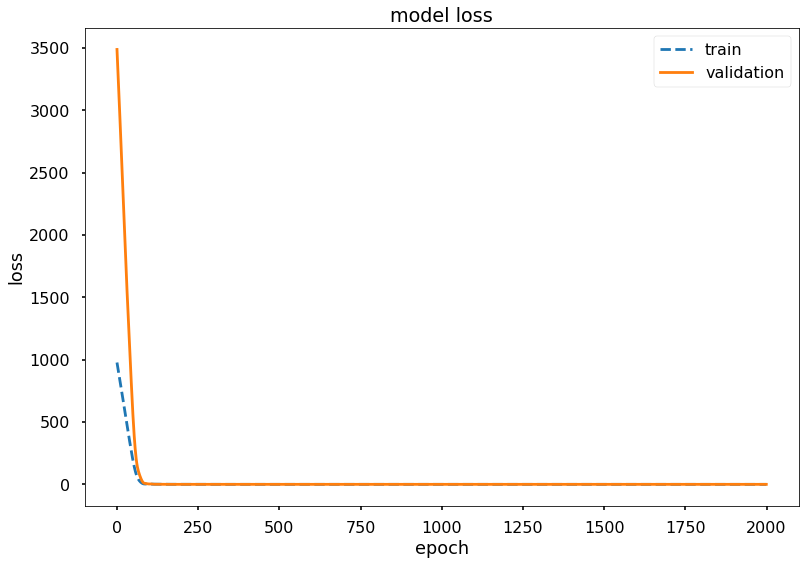

In [20]:
v.plot(history)

## Predictions

In [21]:
test_input = np.array([40, 60])
test_input = test_input.reshape((1, 1, 2))
print("Input: ", test_input)
print("Expected: ", [41, 61])
test_output = model.predict(test_input, verbose=0)
print("Output: ", test_output)

Input:  [[[40 60]]]
Expected:  [41, 61]
Output:  [[40.987053 61.047066]]


___